In [1]:
#from parse_kd import *
import re
import pandas as pd
from chunk_utils import *
import matplotlib
import matplotlib.pyplot as plt
data_dir = './data/dw_freetext/'

In [2]:
%load_ext autoreload
%autoreload 2
matplotlib.rcParams['figure.figsize'] = 24,15

In [3]:
df = pd.read_csv(data_dir+'GunControl_400.csv', delimiter='\t', usecols=[0,6,10])
df_filtered = df[df['Task']=='Copy_2']
# "Copy_2" column = when they're stating true opinion, repeating (transcribing) the essay already written
df_filtered.head(7)

,UserName,Task,ReviewMeta
1,A10E8QHPV30BAD,Copy_2,0 MouseUp 0 0;874 KeyDown 16;946 KeyDown 73;10...
5,A11T1LGIWPM9Z1,Copy_2,0 MouseUp 0 0;784 KeyDown 16;863 KeyDown 84;92...
9,A145PJ769UGAID,Copy_2,0 MouseUp 0 0;1517 KeyDown 16;1517 KeyDown 87;...
13,A161NZP385W1TX,Copy_2,0 MouseUp 0 0;1621 KeyDown 16;1734 KeyDown 84;...
17,A168RQT8B18FH,Copy_2,0 MouseUp 0 0;2112 KeyDown 16;2311 KeyDown 73;...
21,A16HFBY06FP1RJ,Copy_2,0 MouseUp 0 0;317 KeyDown 16;543 KeyDown 71;62...
25,A191P01GHJRPWO,Copy_2,0 MouseUp 0 0;7007 KeyDown 16;7018 KeyDown 73;...


In [52]:
phrases = ["criminal", "constitution", "amendment", "fundamental", "right", "gun", "control", 
           "safe", "citizen", "kill", "violence", "strongly", "think", "feel", 
           "legal", "reason", "fear", "oppose", "government", "power", 
           "freedom", "people"
          ]

# dict of dicts -- examining at user level
userwise_delays = {}
# dict of lists --- examining at population level (throwing away user information)
phrasewise_delays = {x:[] for x in phrases}

for textIndex in range(df_filtered.shape[0]):
#for textIndex in range(100):    
    rawkd = df_filtered['ReviewMeta'].iloc[textIndex]
    uid = df_filtered['UserName'].iloc[textIndex]
    userwise_delays[uid] = {}
    
    for phrase in phrases:
        phrase_keys = get_phrases_from_rawkd(rawkd, phrase)    
        all_delays = [keypress2delays(phrase, keys) for keys in phrase_keys]
        userwise_delays[uid][phrase] = all_delays
        phrasewise_delays[phrase].extend(all_delays)

In [53]:
for phrase in phrasewise_delays:
    print ("{} : {}".format(phrase, len(phrasewise_delays[phrase])))

criminal : 198
constitution : 98
amendment : 72
fundamental : 4
right : 438
gun : 1979
control : 544
safe : 155
citizen : 202
kill : 196
violence : 115
strongly : 8
think : 82
feel : 49
legal : 110
reason : 71
fear : 15
oppose : 38
government : 145
power : 47
freedom : 64
people : 572


In [54]:
import scipy.cluster.hierarchy as hc

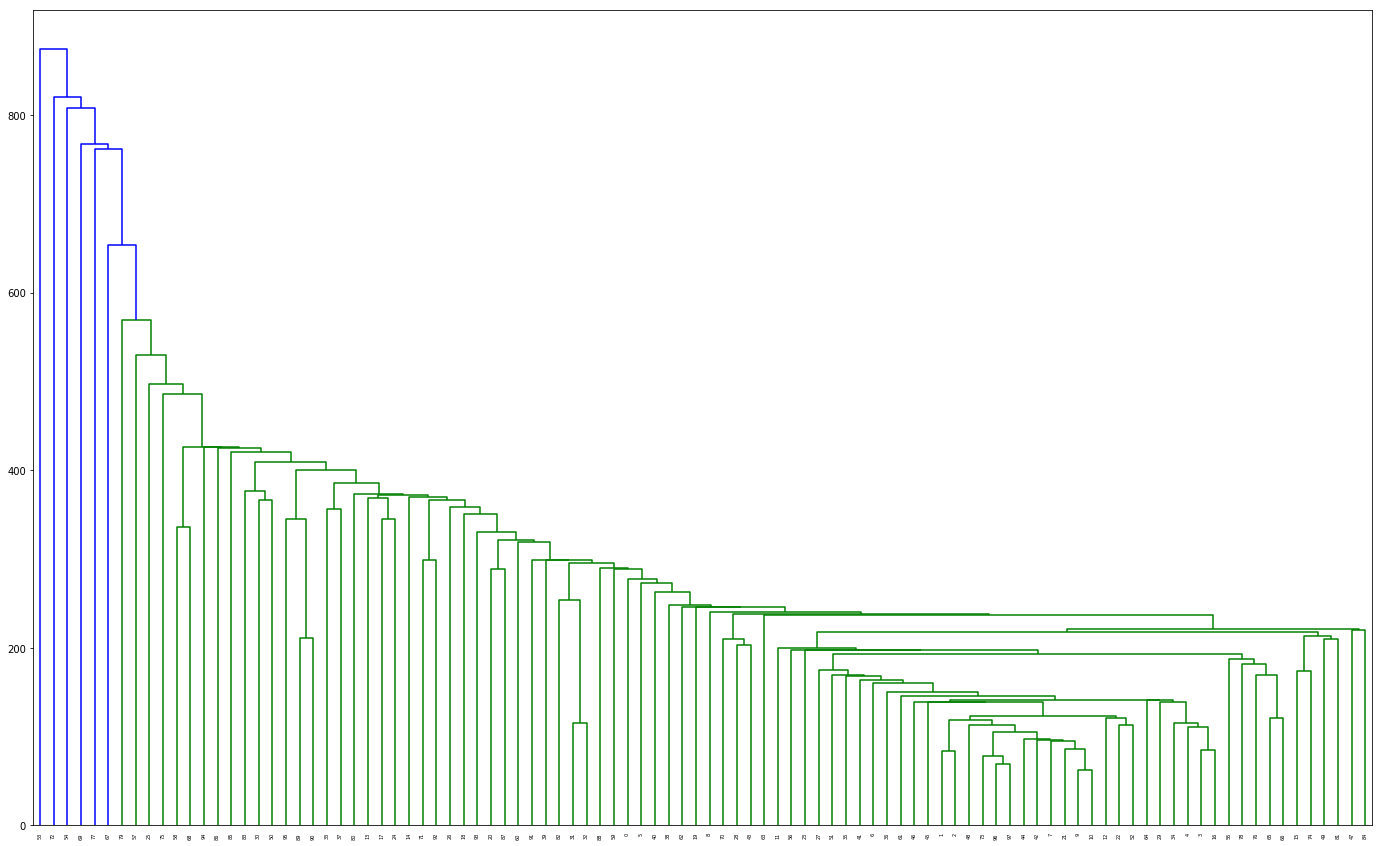

In [56]:
delay_sample = phrasewise_delays['constitution']
dn = hc.dendrogram(hc.linkage(delay_sample))